### Exploratory Data Analysis (EDA) 

Name: Darren King
Student ID: 17145031

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the requisite csv file into a dataframe

df = pd.read_csv('bank.csv')

In [3]:
#Print the 1st 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
#Print the last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


The dataframe has 2000 rows containing bothe numerical and alphabetical/string data relating to direct marketing campaigns of a Portuguese banking institution. 
As per the UCI Machine Learning Repository bank.csv contains 17 inputs (or attributes) and relates to 10% of the bank-additional-full.csv dataset.

### EDA (Quick) of Numerical Attributes

In [5]:
# Let's have a look at a statistical summary for all the numerical attributes of the dataframe

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


From this we can see that there is missing data on the age of 2 of the customers. 
The mean age of the customers contacted was 41.7 years. 
The mean bank balance of the customers was 1413.66 with some lucky individual having 81204 in their account at the time these calls were made. This likely accounts for the skew in the data as seen withe the mean income being 1413 and the median being 551.

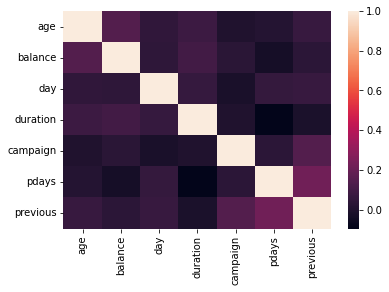

In [6]:
sns.heatmap(df.corr());

The heat map suggests there is little correlation between the numerical attributes. 

### EDA (Quick) of Categorical Attributes

In [11]:
 df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [12]:
df['job'].count()

1990

We don't have data on the jobs of 10 employees 

### Distribution Analysis of Numerical Attributes